<a href="https://colab.research.google.com/github/sapan-s2/AI_Austin_course/blob/main/quiz_1_insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Anime Ratings Case Study
Supervised Learning Regression Project: Anime Rating
Problem Statement
Business Context
Streamist is a streaming company that streams web series and movies for a worldwide audience. Every content on their portal is rated by the viewers, and the portal also provides other information for the content like the number of people who have watched it, the number of people who want to watch it, the number of episodes, duration of an episode, etc.

They are currently focusing on the anime available in their portal, and want to identify the most important factors involved in rating an anime. You as a data scientist at Streamist are tasked with identifying the important factors and building a predictive model to predict the rating on an anime.

Objective
To analyze the data and build a linear regression model to predict the ratings of anime.

Key Questions
What are the key factors influencing the rating of an anime?
Is there a good predictive model for the rating of an anime? What does the performance assessment look like for such a model?
Data Description
Each record in the database provides a description of an anime. A detailed data dictionary can be found below.

Data Dictionary

title - the title of anime
description - the synopsis of the plot
mediaType - format of publication
eps - number of episodes (movies are considered 1 episode)
duration - duration of an episode in minutes
ongoing - whether it is ongoing
sznOfRelease - the season of release (Winter, Spring, Fall)
years_running - number of years the anime ran/is running
studio_primary - primary studio of production
studios_colab - whether there was a collaboration between studios to produce the anime
contentWarn - whether anime has a content warning
watched - number of users that completed it
watching - number of users that are watching it
wantWatch - number of users that want to watch it
dropped - number of users that dropped it before completion
rating - average user rating
votes - number of votes that contribute to rating
tag_Based_on_a_Manga - whether the anime is based on a manga
tag_Comedy - whether the anime is of Comedy genre
tag_Action - whether the anime is of Action genre
tag_Fantasy - whether the anime is of Fantasy genre
tag_Sci_Fi - whether the anime is of Sci-Fi genre
tag_Shounen - whether the anime has a tag Shounen
tag_Original_Work - whether the anime is an original work
tag_Non_Human_Protagonists - whether the anime has any non-human protagonists
tag_Drama - whether the anime is of Drama genre
tag_Adventure - whether the anime is of Adventure genre
tag_Family_Friendly - whether the anime is family-friendly
tag_Short_Episodes - whether the anime has short episodes
tag_School_Life - whether the anime is regarding school life
tag_Romance - whether the anime is of Romance genre
tag_Shorts - whether the anime has a tag Shorts
tag_Slice_of_Life - whether the anime has a tag Slice of Life
tag_Seinen - whether the anime has a tag Seinen
tag_Supernatural - whether the anime has a tag Supernatural
tag_Magic - whether the anime has a tag Magic
tag_Animal_Protagonists - whether the anime has animal protagonists
tag_Ecchi - whether the anime has a tag Ecchi
tag_Mecha - whether the anime has a tag Mecha
tag_Based_on_a_Light_Novel - whether the anime is based on a light novel
tag_CG_Animation - whether the anime has a tag CG Animation
tag_Superpowers - whether the anime has a tag Superpowers
tag_Others - whether the anime has other tags
tag_is_missing - whether tag is missing or not

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#from sklearn.metrics import mean_squared_error

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [3]:
df = pd.read_csv("/content/anime_data.csv")

FileNotFoundError: ignored

In [3]:
df.head()

,title,description,mediaType,eps,duration,ongoing,sznOfRelease,years_running,studio_primary,studios_colab,...,tag_Supernatural,tag_Magic,tag_Animal_Protagonists,tag_Ecchi,tag_Mecha,tag_Based_on_a_Light_Novel,tag_CG_Animation,tag_Superpowers,tag_Others,tag_missing
0,Fullmetal Alchemist: Brotherhood,The foundation of alchemy is based on the law ...,TV,64,NaN,False,Spring,1,Bones,0,...,0,0,0,0,0,0,0,0,0,0
1,your name.,Mitsuha and Taki are two total strangers livin...,Movie,1,107.0,False,is_missing,0,Others,0,...,1,0,0,0,0,0,0,0,0,0
2,A Silent Voice,"After transferring into a new school, a deaf g...",Movie,1,130.0,False,is_missing,0,Kyoto Animation,0,...,0,0,0,0,0,0,0,0,0,0
3,Haikyuu!! Karasuno High School vs Shiratorizaw...,"Picking up where the second season ended, the ...",TV,10,NaN,False,Fall,0,Production I.G,0,...,0,0,0,0,0,0,0,0,0,0
4,Attack on Titan 3rd Season: Part II,The battle to retake Wall Maria begins now! Wi...,TV,10,NaN,False,Spring,0,Others,0,...,0,0,0,0,0,0,0,0,0,0


NAN values are observed for Duration
sznOfRelease seems to have isMissing for null values

In [8]:
df.shape


(12101, 44)

total 12101 records

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12101 entries, 0 to 12100
Data columns (total 44 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   title                       12101 non-null  object 
 1   description                 7633 non-null   object 
 2   mediaType                   12101 non-null  object 
 3   eps                         12101 non-null  int64  
 4   duration                    7465 non-null   float64
 5   ongoing                     12101 non-null  bool   
 6   sznOfRelease                12101 non-null  object 
 7   years_running               12101 non-null  int64  
 8   studio_primary              12101 non-null  object 
 9   studios_colab               12101 non-null  int64  
 10  contentWarn                 12101 non-null  int64  
 11  watched                     12101 non-null  float64
 12  watching                    12101 non-null  int64  
 13  wantWatch                   121

Total 12101 entries
description and duration are missing values for 5000 titles approx
mediaType and sznOfrelease looks categorical values

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
eps,12101.0,13.393356,57.925097,1.000,1.000,2.000,12.000,2527.000
duration,7465.0,24.230141,31.468171,1.000,4.000,8.000,30.000,163.000
years_running,12101.0,0.283200,1.152234,0.000,0.000,0.000,0.000,51.000
studios_colab,12101.0,0.051649,0.221326,0.000,0.000,0.000,0.000,1.000
contentWarn,12101.0,0.115362,0.319472,0.000,0.000,0.000,0.000,1.000
watched,12101.0,2862.605694,7724.347024,0.000,55.000,341.000,2026.000,161567.000
watching,12101.0,256.334435,1380.840902,0.000,2.000,14.000,100.000,74537.000
wantWatch,12101.0,1203.681431,2294.327380,0.000,49.000,296.000,1275.000,28541.000
dropped,12101.0,151.568383,493.931710,0.000,3.000,12.000,65.000,19481.000
rating,12101.0,2.949037,0.827385,0.844,2.304,2.965,3.616,4.702


Rating looks to be in the range of 0-5 with max of 4.7 and good percentage have awared 3 plus rating to the titles
There are 1 min duration titles

In [19]:
df.isnull().sum()

title                            0
description                   4468
mediaType                        0
eps                              0
duration                      4636
ongoing                          0
sznOfRelease                     0
years_running                    0
studio_primary                   0
studios_colab                    0
contentWarn                      0
watched                          0
watching                         0
wantWatch                        0
dropped                          0
rating                           0
votes                            0
tag_Based_on_a_Manga             0
tag_Comedy                       0
tag_Action                       0
tag_Fantasy                      0
tag_Sci_Fi                       0
tag_Shounen                      0
tag_Original_Work                0
tag_Non_Human_Protagonists       0
tag_Drama                        0
tag_Adventure                    0
tag_Family_Friendly              0
tag_Short_Episodes  

In [11]:
df.duplicated().sum()


0

In [13]:
# filtering non-numeric columns
cat_columns = df.select_dtypes(exclude=np.number).columns
cat_columns

Index(['title', 'description', 'mediaType', 'ongoing', 'sznOfRelease',
       'studio_primary'],
      dtype='object')

In [15]:
cat_col = cat_columns[2:]
cat_col

Index(['mediaType', 'ongoing', 'sznOfRelease', 'studio_primary'], dtype='object')

In [16]:
for col in cat_col:
  print(df[col].value_counts())

TV             3993
Movie          1928
OVA            1770
Music Video    1290
Web            1170
DVD Special     803
Other           580
TV Special      504
is_missing       63
Name: mediaType, dtype: int64
False    11986
True       115
Name: ongoing, dtype: int64
is_missing    8554
Spring        1135
Fall          1011
Winter         717
Summer         684
Name: sznOfRelease, dtype: int64
Others                  4340
is_missing              3208
Toei Animation           636
Sunrise                  430
J.C. Staff               341
MADHOUSE                 337
TMS Entertainment        317
Production I.G           271
Studio Deen              260
Studio Pierrot           221
OLM                      210
A-1 Pictures             194
AIC                      167
Shin-Ei Animation        164
Nippon Animation         145
Tatsunoko Production     144
DLE                      130
GONZO                    124
Bones                    121
Shaft                    118
XEBEC                   

In [22]:
#drop the missing values in the data set
df.dropna(inplace=True)
df.shape

(3712, 44)

In [38]:
#droping desc and duration as they had missing values
df.drop(["description","duration"],axis=1,inplace=True)


KeyError: ignored

In [41]:
def hist_box_plot_funct(records):
     print('Hist and Box plot for All Numeric types')
     for rec in records:
      print('Hist plot for : ', rec)
      sns.histplot(data=df, x=rec,kde=True)
      plt.show()
      print('Boxplot for : ', rec)
      sns.boxplot(data=df, x=rec)
      plt.show()

numeric_rec=df.select_dtypes(exclude=np.object).columns
print(numeric_rec)
# hist_box_plot_funct(numeric_rec)
# sns.histplot(data=df,x='rating',kde=True)
# plt.show()
# sns.boxplot(data=df,x='rating')


Index(['eps', 'ongoing', 'years_running', 'studios_colab', 'contentWarn',
       'watched', 'watching', 'wantWatch', 'dropped', 'rating', 'votes',
       'tag_Based_on_a_Manga', 'tag_Comedy', 'tag_Action', 'tag_Fantasy',
       'tag_Sci_Fi', 'tag_Shounen', 'tag_Original_Work',
       'tag_Non_Human_Protagonists', 'tag_Drama', 'tag_Adventure',
       'tag_Family_Friendly', 'tag_Short_Episodes', 'tag_School_Life',
       'tag_Romance', 'tag_Shorts', 'tag_Slice_of_Life', 'tag_Seinen',
       'tag_Supernatural', 'tag_Magic', 'tag_Animal_Protagonists', 'tag_Ecchi',
       'tag_Mecha', 'tag_Based_on_a_Light_Novel', 'tag_CG_Animation',
       'tag_Superpowers', 'tag_Others', 'tag_missing'],
      dtype='object')


<ipython-input-41-05e8ab13ec66>:11: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  numeric_rec=df.select_dtypes(exclude=np.object).columns


rating is a normal distribution, so we can proceed with regression model

In [44]:
x=df.drop(['rating'],axis=1)
y=df.rating

In [45]:
x = pd.get_dummies(
    x,
    columns=x.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
x.head()

,eps,ongoing,years_running,studios_colab,contentWarn,watched,watching,wantWatch,dropped,votes,...,studio_primary_Shaft,studio_primary_Shin-Ei Animation,studio_primary_Studio Deen,studio_primary_Studio Pierrot,studio_primary_Sunrise,studio_primary_TMS Entertainment,studio_primary_Tatsunoko Production,studio_primary_Toei Animation,studio_primary_XEBEC,studio_primary_is_missing
1,1,False,0,0,0,58831.0,1453,21733,124,43960,...,0,0,0,0,0,0,0,0,0,0
2,1,False,0,0,1,45892.0,946,17148,132,33752,...,0,0,0,0,0,0,0,0,0,0
8,1,False,0,0,0,8454.0,280,6624,150,6254,...,0,0,0,0,1,0,0,0,0,0
27,1,False,0,0,0,115949.0,589,12388,161,82752,...,0,0,0,0,0,0,0,0,0,0
31,1,False,0,0,0,35896.0,538,15651,130,26465,...,0,0,0,0,0,0,0,0,0,0


In [47]:
x.shape

(3712, 42)

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [49]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2598
Number of rows in test data = 1114


In [51]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

LinearRegression()

In [54]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf


In [59]:
# Checking model performance on train set
print("Training Performance\n")
lin_reg_model_train_perf = model_performance_regression(lin_reg_model, x_train, y_train)
lin_reg_model_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,6.443380e-12,3.305307e-12,1.0,1.0,1.054819e-10


In [60]:
# Checking model performance on test set
print("Training Performance\n")
lin_reg_model_test_perf = model_performance_regression(lin_reg_model, x_test, y_test)
lin_reg_model_test_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.597844,0.481061,0.483806,1.215339,18.376855


In [4]:
df=pd.read_csv("insurance.csv")

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.shape

(1338, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
df.duplicated().sum()

1

In [10]:
cat_columns = df.select_dtypes(exclude=np.number).columns
print(cat_columns)
numeric_rec=df.select_dtypes(exclude=np.object).columns
print(numeric_rec)

Index(['sex', 'smoker', 'region'], dtype='object')
Index(['age', 'bmi', 'children', 'charges'], dtype='object')


<ipython-input-10-c7a146e57e81>:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  numeric_rec=df.select_dtypes(exclude=np.object).columns


In [11]:
hist_box_plot_funct(numeric_rec)

NameError: ignored

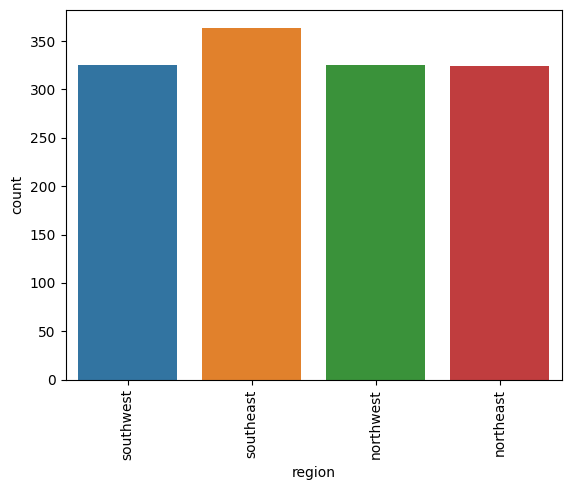

In [85]:
sns.countplot(data=df,x='region')
plt.xticks(rotation=90)
plt.show()

<ipython-input-158-d207b7d46160>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")


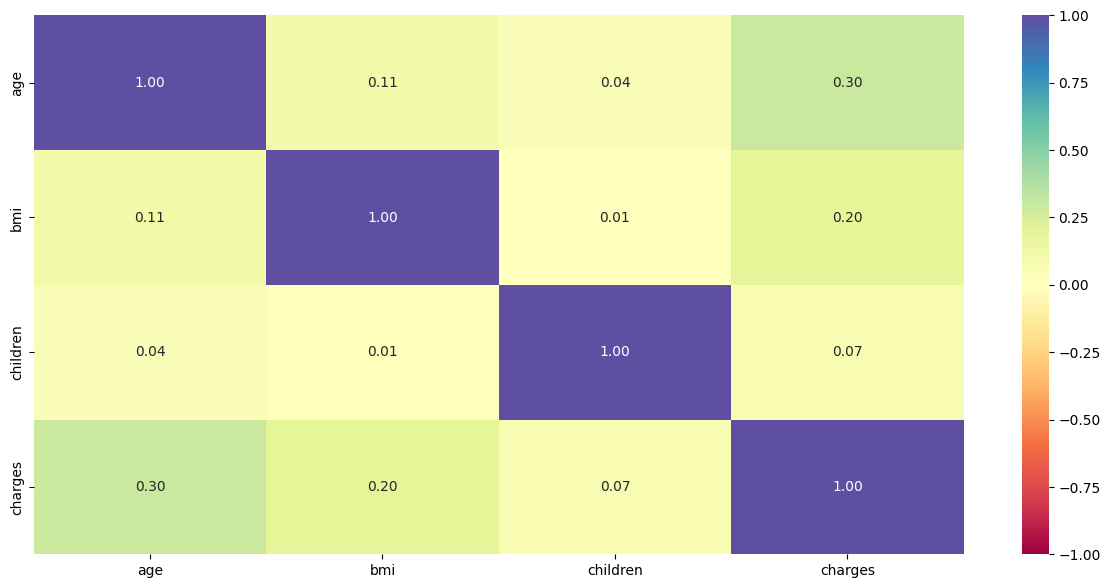

In [158]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

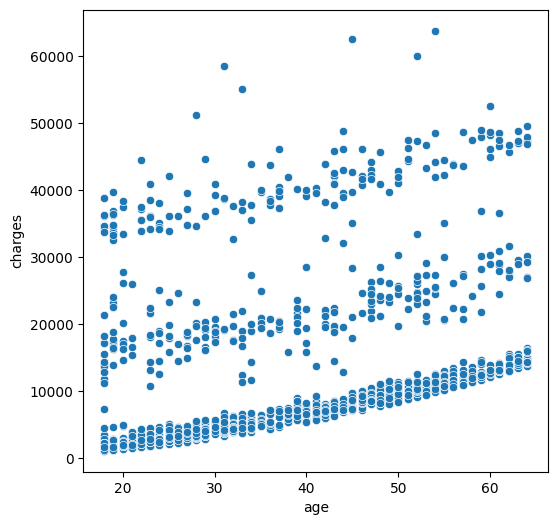

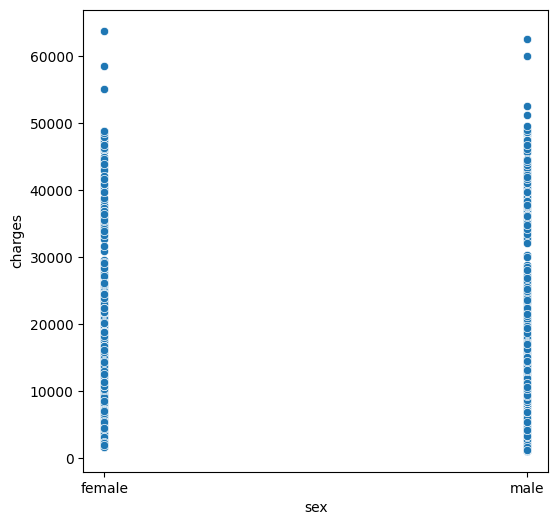

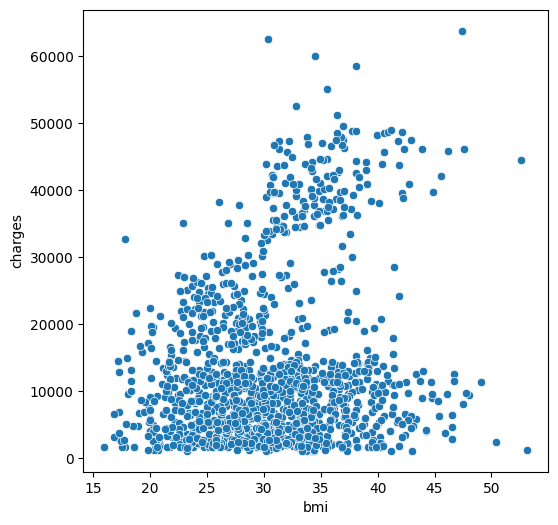

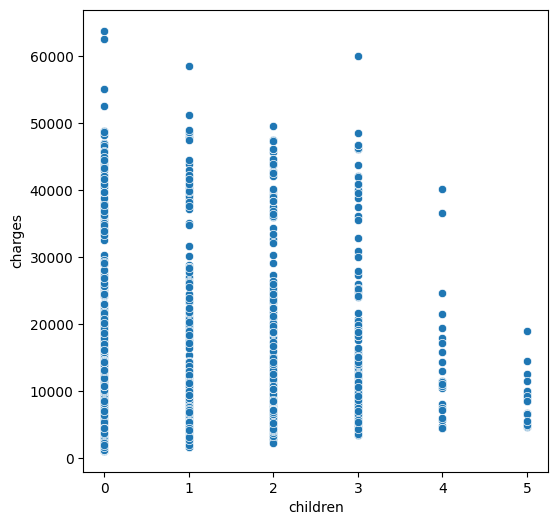

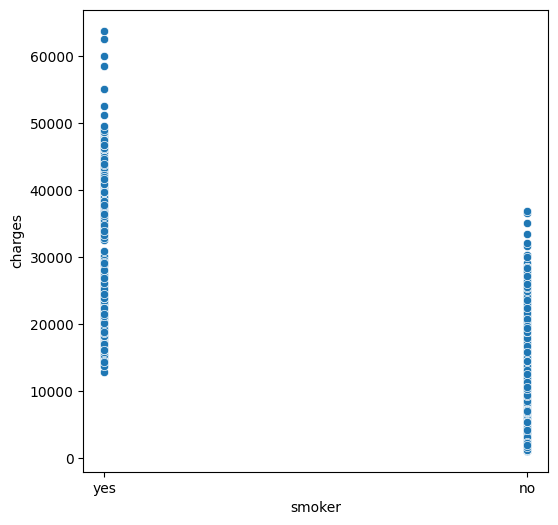

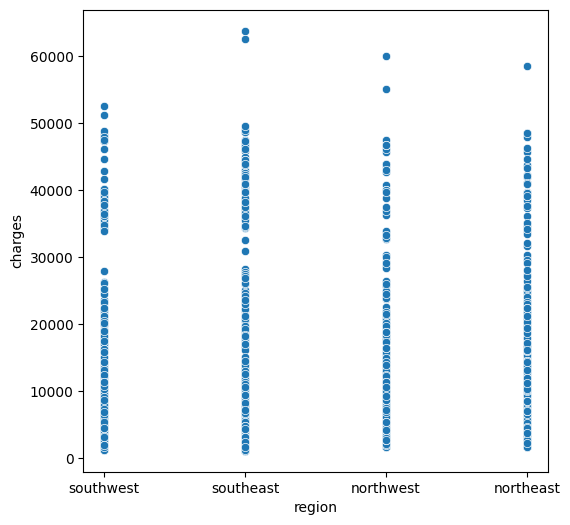

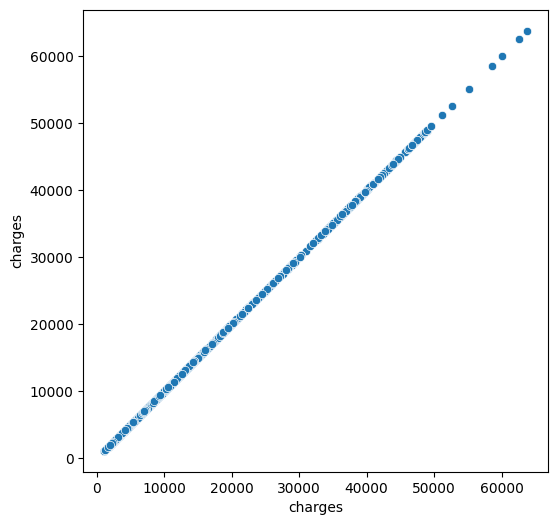

In [159]:
for i in df.columns:
    plt.figure(figsize=(6, 6))
    sns.scatterplot(data=df, x=i, y="charges")
    plt.show()

<Axes: xlabel='bmi_log', ylabel='Count'>

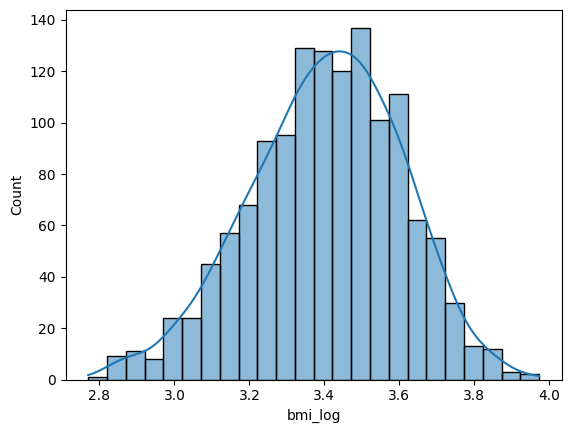

In [160]:
df['bmi_log'] = np.log(df['bmi'])
sns.histplot(data=df, x='bmi_log', kde = True)

In [93]:
cat_columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [12]:
df = pd.get_dummies(
    df,
    columns=df.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [13]:
df.drop(['bmi_log'],inplace=True,axis=1)
df.head()

KeyError: ignored

In [15]:
import statsmodels.api as sm
Y = df['charges']
X = df.drop(['charges'],axis=1)
X = sm.add_constant(X)

In [16]:
# splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30 , random_state=1)

In [17]:
X_test.shape

(402, 9)

In [18]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

LinearRegression()

In [19]:
y_train.head()

744     8827.2099
363     2597.7790
10      2721.3208
970    10702.6424
634     9391.3460
Name: charges, dtype: float64

In [21]:
# get the score (R-squared) on the training set

print(
    "The score (R-squared) on the training set is ",
    lin_reg_model.score(X_train, y_train),
)

The score (R-squared) on the training set is  0.7545557492633161


In [22]:
print(
    "The score (R-squared) on the test set is ", lin_reg_model.score(X_test, y_test)
)

The score (R-squared) on the test set is  0.7405989316927211


In [20]:
lin_reg_model.intercept_

-11039.238418561557

In [196]:
coef_df = pd.DataFrame(
    np.append(lin_reg_model.coef_, lin_reg_model.intercept_),
    index=X_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)

coef_df

,Coefficients
age,251.681865
bmi,322.389107
children,344.964255
sex_male,-282.796347
smoker_yes,24059.390477
region_northwest,-304.090098
region_southeast,-939.342097
region_southwest,-868.188559
Intercept,-11039.238419


In [23]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2, interaction_only=True)

In [24]:
X_train2 = poly.fit_transform(X_train)

X_test2 = poly.fit_transform(X_test)

In [26]:
poly_clif = LinearRegression()
poly_clif.fit(X_train2,y_train)

LinearRegression()

In [27]:
poly_clif.score(X_train2,y_train)

0.8431504621486455

In [29]:
from sklearn.metrics import mean_absolute_error
y_pred = lin_reg_model.predict(X_test)
mean_absolute_error(y_test, y_pred)

4139.932064766016